# Credit Card Fraud Analysis

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px 
import datetime as dt
sns.set(rc = {'figure.figsize':(20,10)})
fraud_df = pd.read_csv('fraudTrain.csv')
fraud_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [79]:
fraud_df.drop_duplicates(inplace=True)

## Data Analysis

#### Transaction Amount vs Fraud

In [70]:
### Examine how various features relate to fraud 

In [80]:
fraud_df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [82]:
np.percentile(fraud_df['amt'],99)

545.9926000000002

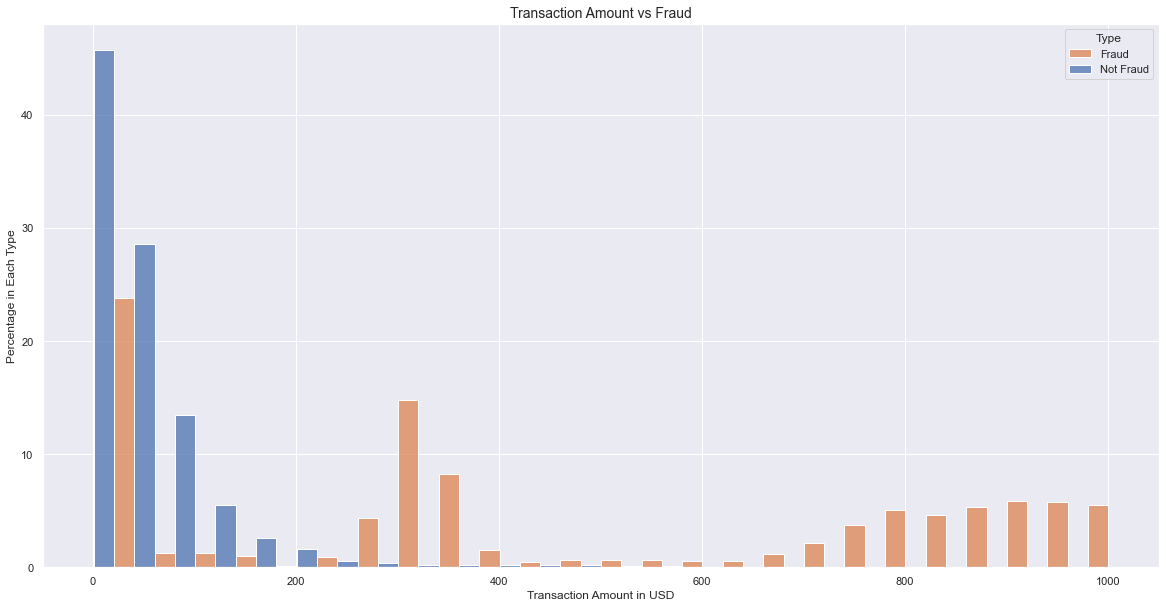

In [83]:
## amount vs fraud plot 
#amount vs fraud
ax=sns.histplot(x='amt',data=fraud_df[fraud_df['amt']<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_title('Transaction Amount vs Fraud', fontsize=14)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [21]:
#While normal transactions tend to be around $200 or less, fraud transactions are typically peak around $300 as well as $800-$1000

#### Gender vs Fraud

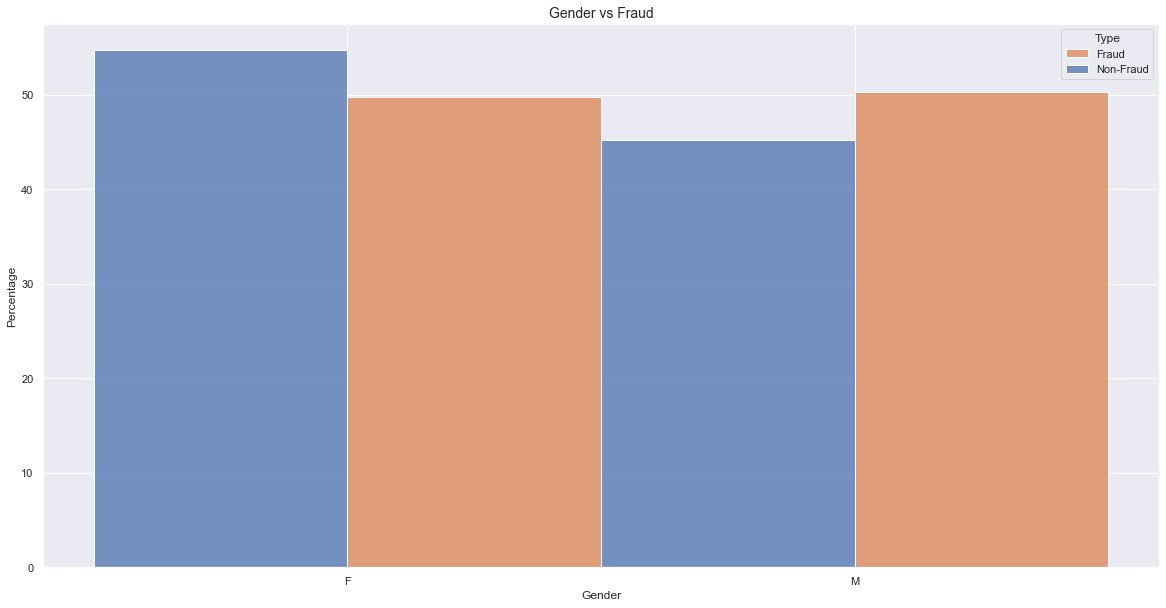

In [84]:
#plot gender vs fraud 
ax = sns.histplot(x=fraud_df['gender'], data=fraud_df, hue=fraud_df['is_fraud'], 
                  stat='percent', multiple='dodge', common_norm=False)

ax.set_title("Gender vs Fraud", fontsize=14)
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")

plt.legend(title='Type', labels=['Fraud', 'Non-Fraud'])

In [26]:
## No clear difference between genders. Females and Males are both equally susceptible to fraud transaction and gender is not an indicative amount of fraud transaction

#### Spending Category vs Fraud

Text(0.5, 1.0, 'Percent Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

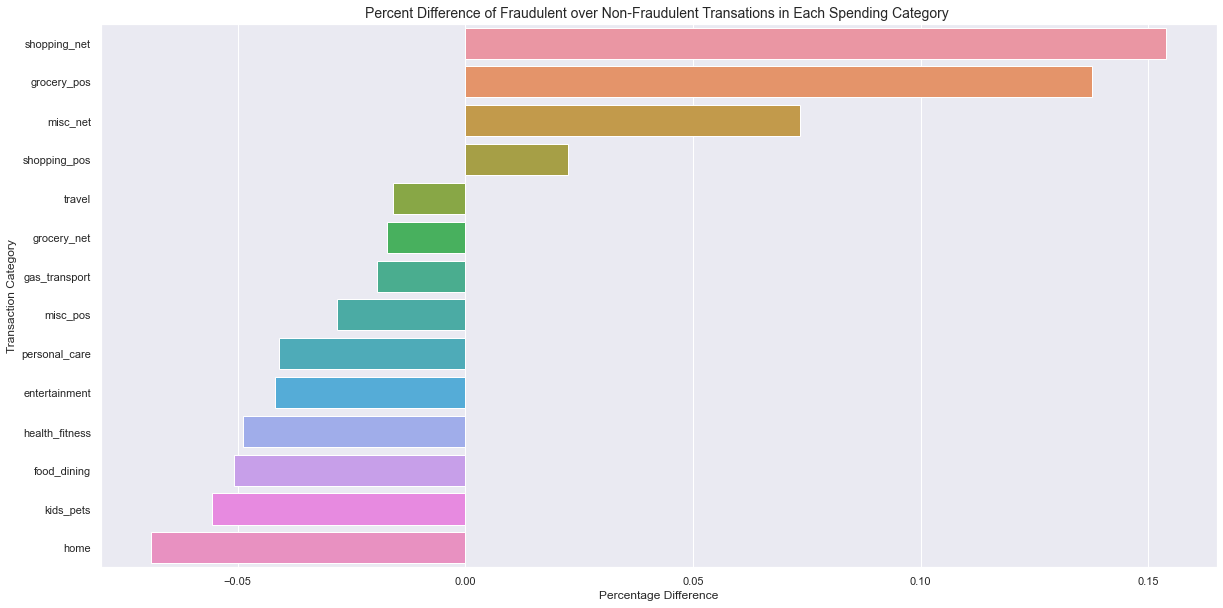

In [85]:
#calculate the percentage difference
spending_cat_1=fraud_df[fraud_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
spending_cat_1.columns=['Category','Non-Fraud Percentage']

spending_cat_2=fraud_df[fraud_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
spending_cat_2.columns=['Category','Fraud Percentage']

merge=spending_cat_1.merge(spending_cat_2,on='Category')
merge['diff']=merge['Fraud Percentage']-merge['Non-Fraud Percentage']

fig=sns.barplot(y='Category',x='diff',data=merge.sort_values('diff',ascending=False))
fig.set_xlabel('Percentage Difference')
fig.set_ylabel('Transaction Category')
plt.title('Percent Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ', fontsize=14)


In [34]:
## Some categories have more fraudulent transactions than others. These tend to be Shopping, Groceries, and Miscellaneous. Home, Kids/Pets tend to have more normal transactions

#### Age vs Fraud

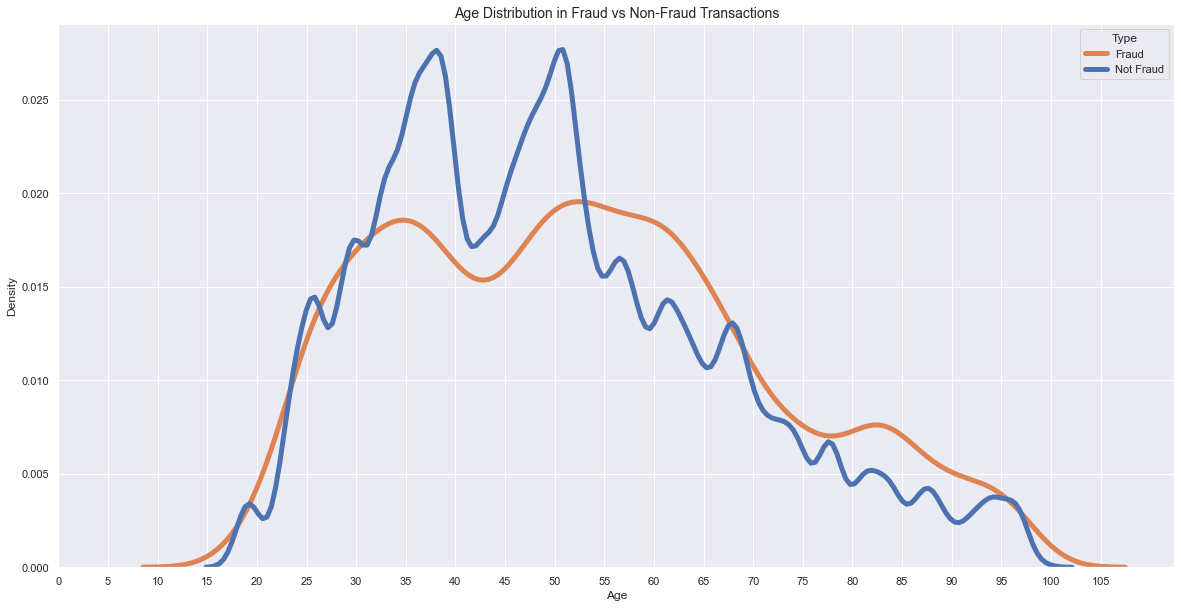

In [86]:
fraud_df['age']=dt.date.today().year-pd.to_datetime(fraud_df['dob']).dt.year

fig=sns.kdeplot(x=fraud_df['age'],data=fraud_df, hue=fraud_df['is_fraud'], linewidth=5,common_norm=False)
fig.set_xlabel('Age')
fig.set_ylabel('Density')

plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraud vs Non-Fraud Transactions', fontsize=14)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [45]:
#Normal transactions are highest at ages 37-38 and 49-50
#Fraud transactions are smoother, second peak includes a bigger group (ages 50-65)
#Older people are more likely to be subject to fraud transactions than younger people

In [56]:
#constructing the age-transaction count distribution
age = fraud_df[['age','trans_num']].groupby(['age']).count().reset_index()
age.columns = ['age', 'age_count']

#creating the age-fraud distribution
fraud_age = fraud_df[['age', 'trans_num', 'is_fraud']].groupby(['age','is_fraud']).count().reset_index()
fraud_age.columns = ['age', 'is_fraud', 'Transaction Count']

fraud_age = fraud_age.merge(age[['age', 'age_count']], how='inner', on='age')

fraud_age['Transaction percentage'] = (fraud_age['Transaction Count']/fraud_age['age_count'])*100

fraud_age

,age,is_fraud,Transaction Count,age_count,Transaction percentage
0,18,0,1952,1959,99.642675
1,18,1,7,1959,0.357325
2,19,0,7464,7496,99.573106
3,19,1,32,7496,0.426894
4,20,0,3954,3975,99.471698
...,...,...,...,...,...
155,96,1,47,4645,1.011841
156,97,0,6038,6063,99.587663
157,97,1,25,6063,0.412337
158,98,1,11,11,100.000000


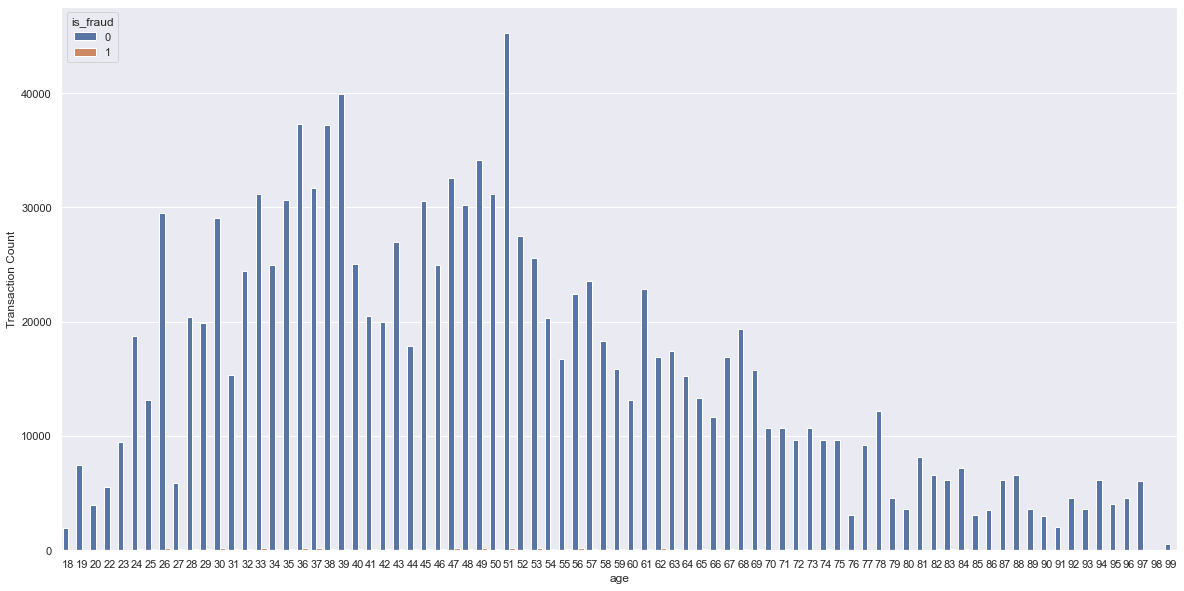

In [87]:
sns.barplot(data=fraud_age, y='Transaction Count', x='age', hue='is_fraud')

plt.show()

### Time vs Fraud 

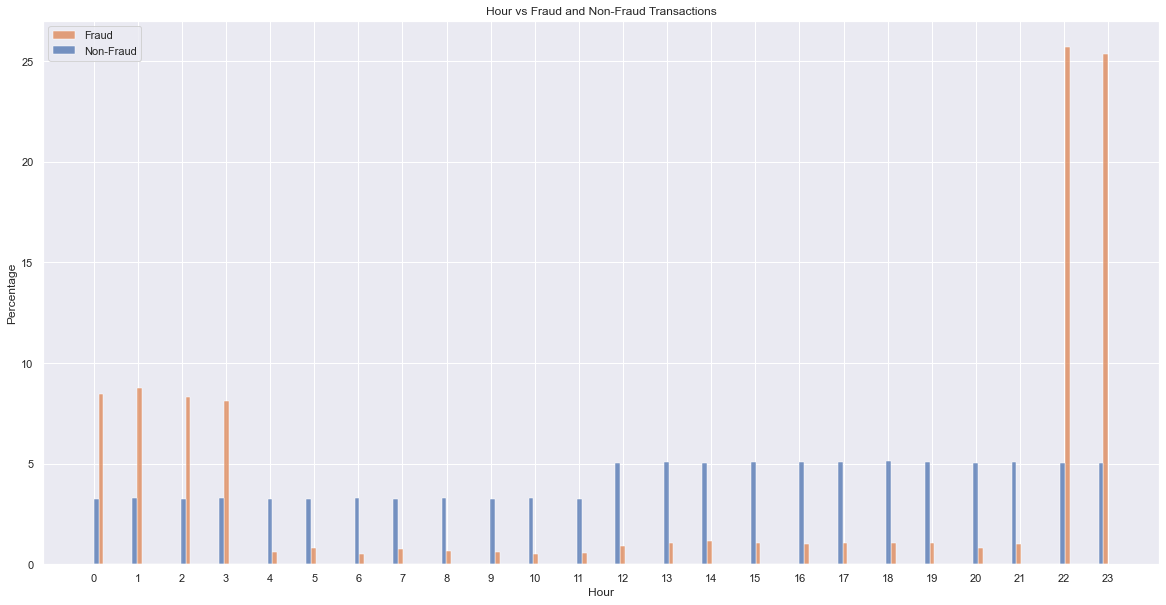

In [88]:
### HOURLY 
fraud_df['hour'] = pd.to_datetime(fraud_df['trans_date_trans_time']).dt.hour
fig = sns.histplot(data=fraud_df, x=fraud_df['hour'], hue=fraud_df['is_fraud'], common_norm=False, 
                   stat='percent', multiple='dodge')

fig.set_xlabel('Hour')
fig.set_ylabel('Percentage')
plt.title('Hour vs Fraud and Non-Fraud Transactions')
plt.xticks(np.arange(0,24,1))
plt.legend(labels=['Fraud', 'Non-Fraud'])

In [89]:
#Normal transactions happen throughout the day
#Fraud transactions happen more so around midnight 

/var/folders/3r/c3f8fkg133j5lzmz5kvvs0p00000gn/T/ipykernel_82773/4168256504.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


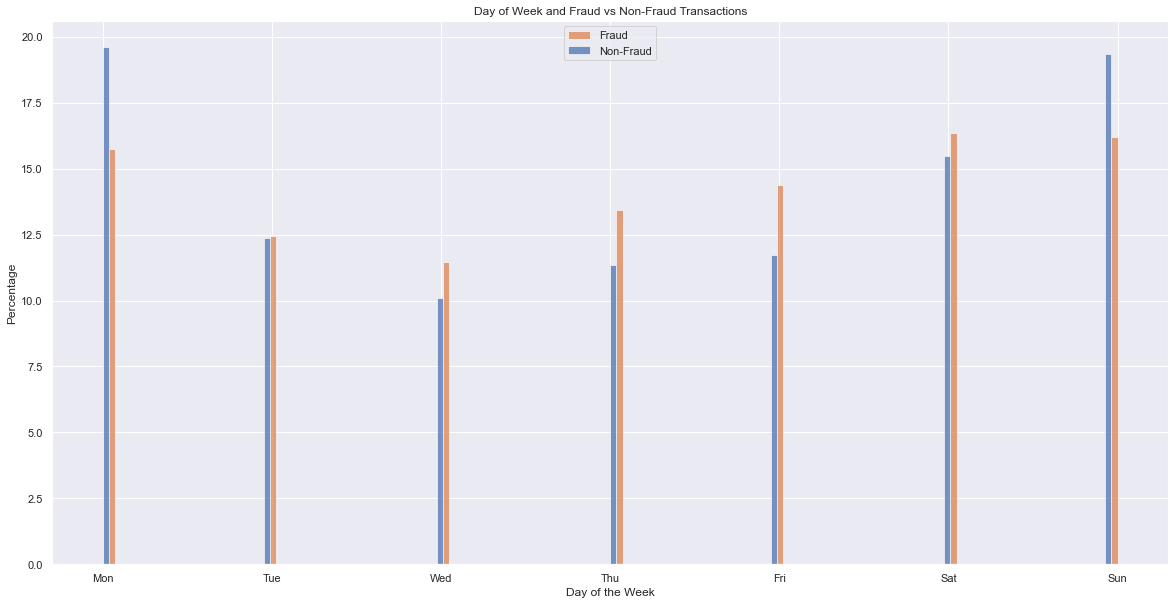

In [90]:
### WEEKLY 
fraud_df['day'] = pd.to_datetime(fraud_df['trans_date_trans_time']).dt.dayofweek

fig = sns.histplot(data=fraud_df, x=fraud_df['day'], hue=fraud_df['is_fraud'], common_norm=False, stat='percent', multiple='dodge')

fig.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

fig.set_xlabel('Day of the Week')
fig.set_ylabel('Percentage')

plt.title('Day of Week and Fraud vs Non-Fraud Transactions')
plt.legend(labels=['Fraud', 'Non-Fraud'])

In [ ]:
##Normal transactions happen more on Sunday and Monday and fraud ones tend to be spread out during the  week

/var/folders/3r/c3f8fkg133j5lzmz5kvvs0p00000gn/T/ipykernel_82773/2188959031.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])


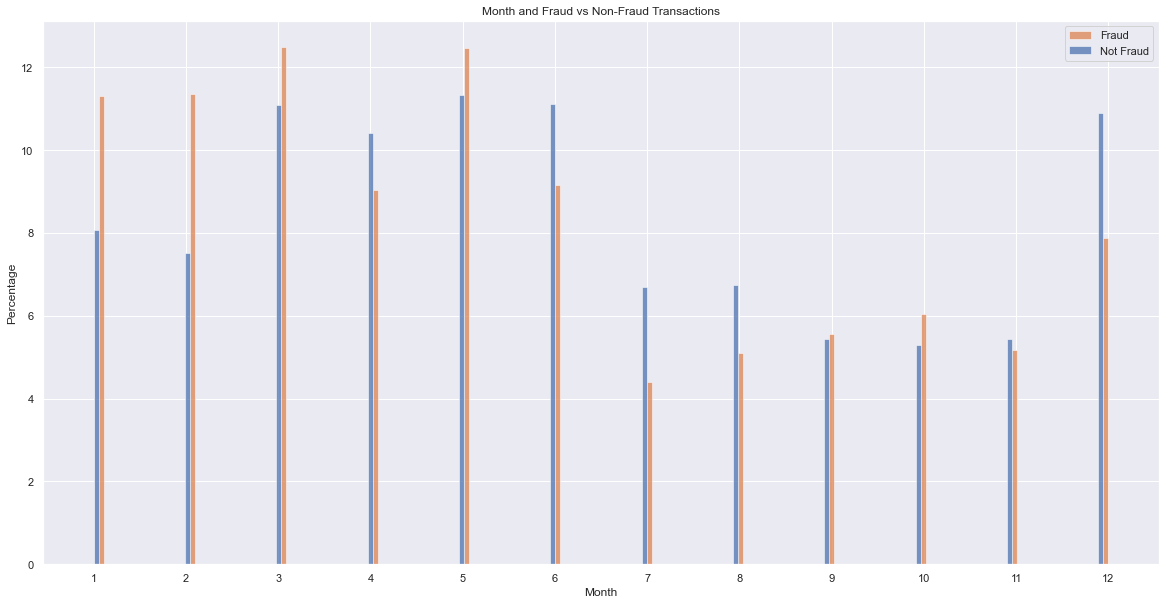

In [92]:
## MONTHLY 
#month vs fraud
fraud_df['month']=pd.to_datetime(fraud_df['trans_date_trans_time']).dt.month
fig=sns.histplot(data=fraud_df, x=fraud_df["month"], hue=fraud_df["is_fraud"], common_norm=False,stat='percent',multiple='dodge')
fig.set_xlabel('Month')
fig.set_ylabel('Percentage')
plt.title('Month and Fraud vs Non-Fraud Transactions')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(labels=['Fraud', 'Not Fraud'])

In [93]:
#Normal payments are highest around holiday season (December) and sprign/summer 
#Fraud are more concentrated in Jan-May

### State vs Fraud 

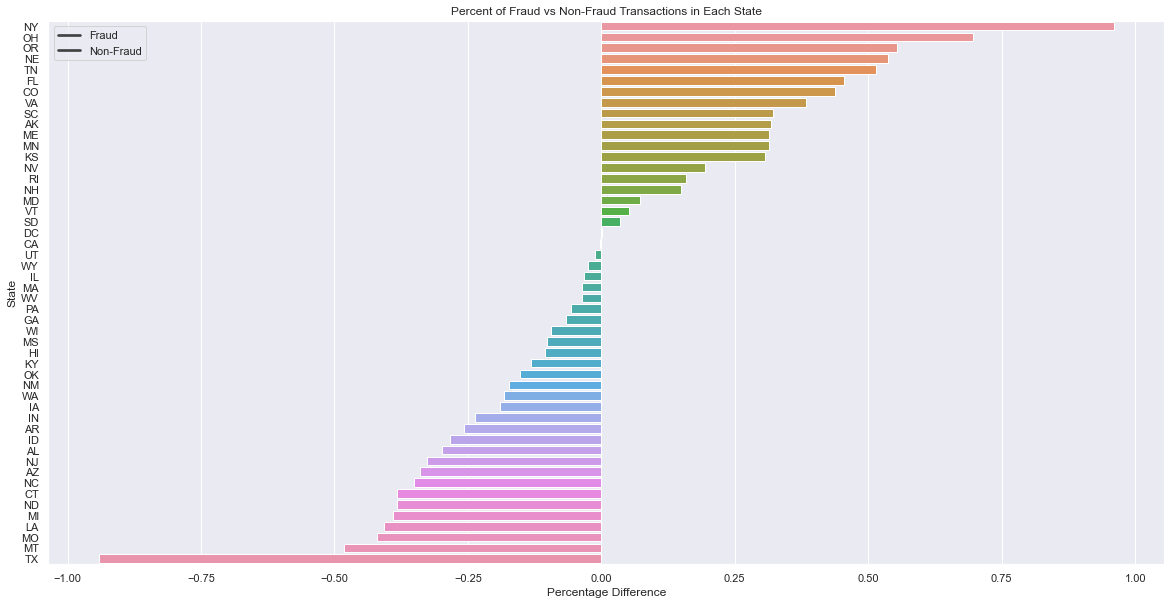

In [101]:
state_1=fraud_df['state'][fraud_df.is_fraud==0].value_counts(normalize=True)
state_1=state_1.to_frame()
state_1=state_1.reset_index()
state_1.columns = ['State', 'Percentage']

state_2=fraud_df['state'][fraud_df.is_fraud==1].value_counts(normalize=True)
state_2=state_2.to_frame()
state_2=state_2.reset_index()
state_2.columns = ['State', 'Percentage']

merge_cols=state_1.merge(state_2,on='State')
merge_cols['diff']=merge_cols['Percentage_y']-merge_cols['Percentage_x']
merge_cols['diff']=merge_cols['diff']*100
merge_cols=merge_cols.sort_values('diff',ascending=False)

fig = sns.barplot(data=merge_cols, x='diff', y='State')
fig.set_xlabel('Percentage Difference')
fig.set_ylabel('State')
plt.title('Percent of Fraud vs Non-Fraud Transactions in Each State')
plt.legend(labels=['Fraud', 'Non-Fraud'])
plt.show()